In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Purpose of this Notebook

Investigate two methods of significance testing through the lens of marketing program optimization. The two methods are:

1. **Two-Tailed** test to see if treatment sample mean **is different** from control sample mean
2. **One-Tailed** test to see if there is a **positive difference** between treatment sample mean and control sample mean

The difference between those two methods seems like nuance. But it's theoretically huge.

In the first case, my implicit assumption is that the control group yielded its true mean during the experiment time frame. I establish a null hypothesis based around the control group's mean. Then, I contrast the treatment's mean with the control's mean to see if the treatment's mean is random, assuming the control mean is the true mean.

I also reject the null when a treatment underperforms the control. In reality, we wouldn't adopt a new idea if that happened. So, its external validity is low.

In the second case, my implicit assumption is that there is 0 difference between the control group's mean and the treatment group's mean. My null hypothesis is then based around a mean difference of 0. Then, I contrast the observed mean difference with the assumed difference of 0 and see if our observed difference occurred by chance or not.

I also reject the null only when the treatment outperforms the control. This more accurately reflects marketing decision making in the real world. A new idea is only getting adopted when it **beats** status quo.

## The implication is really about maximizing external validity

In both cases, the test is structured to measure what it purports to measure **within the sample**, so internal validty is high. 

In case one, I'm able to demonstrate that my treatment mean is likley different from my control mean. 

In case two, I'm able to demonstrate that my sample does or doesn't show a significant positive difference between the two means (treatment - control).

However, case 1 assumes that I didn't get the control mean by random chance. That it represents the population mean without the treatment. This reduces external validity. It forgets about biases involving the sample and time.

## And I want to answer this question

What would have to be the case for both to yield materially different results? (Results that change the decision being made)

# Part 0: Define Global Parameters
1. Control probability
2. Treatment probability
3. Group size (assume 50/50 split, so sample is 2x group_size)
4. Count of simulation runs

In [67]:
# Define behavior rates
prob_control = 0.10
prob_treatment = 0.12
group_size = 1000
runs = 200000

# Part 1: Two-Tailed Test Contrasting Sample Means

Null Hypothesis: Treatment mean is not different than control mean. (Treatment conversion rate is same as control conversion rate)

Alt Hypothesis: Treatment mean is different than control mean. (Treatment conversion rate is different than control conversion rate)

In [2]:
## PSEUDO CODE

# Simulate distribution under null (treatment is not different than null) 
# Random draw 1 or 0 weighted for control conv rate 200,000 times

# Define extremeties using conversion rate of treatment (upper extreme, lower extreme)

# Measure % of null cases above and below those two extremes. That's p, baby.

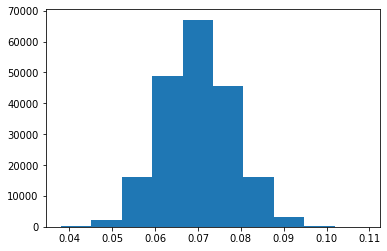

In [15]:
# Simulate null distribution
sample_means = []

for i in range(runs):
    sample = np.random.choice(a = [0,1],
                             size = group_size,
                             p = [1-prob_control, prob_control])
    sample_means.append(np.mean(sample))
    
plt.hist(sample_means);

In [16]:
# Define extremities using treatment probability
sample_means = np.asarray(sample_means) # Convert list to nparray to allow numerical comparison in proportion calcs
sampling_mean = np.mean(sample_means)
mean_diff = prob_treatment - sampling_mean

extremity_upper = prob_treatment
extremity_lower = sampling_mean - mean_diff

proportion_upper = (sample_means >= extremity_upper).mean()
proportion_lower = (sample_means <= extremity_lower).mean()

p = proportion_upper + proportion_lower
print('P Value: {}'.format(p))

P Value: 0.000235


# Part 2: One-Tailed Test Contrasting Presumed and Observed Differences

Difference = Treatment - Control

Null Hypothesis: The difference between the control conversion rate and treatment conversion rate is 0 or less.

Alt Hypothesis: The difference between the control conversion rate the treatment conversion rate is greater than 0.

Same procedure as above, with a few key differences:

1. Simulate treatment - control **differences** rather than control probabilities
2. One-tailed, so just need upper extremity and upper proportion for P value

In [30]:
# Get full sample mean. If we assume no difference between probs, then full sample outcome rate is the same as each group's rate
prob_sample = ((prob_control*group_size) + (prob_treatment*group_size))/(2*group_size)
# Get observed difference
observed_difference = prob_treatment - prob_control

print('Observed Difference: {}\n'.format(observed_difference))
print('Full Sample Probability: {}\n{} Total Observations'.format(prob_sample, 2*group_size))

Observed Difference: -0.020000000000000004

Full Sample Probability: 0.06
2000 Total Observations


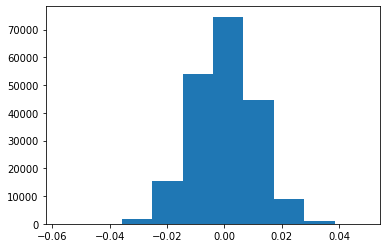

In [31]:
sample_differences = []

for i in range(runs):
    # Get a random distribution of control outcome rates (means)
    sample_control = np.random.choice(a = [0,1], size = group_size, p = [1-prob_sample, prob_sample])
    
    # Get a random distribution of treatment outcome rates (means)
    sample_treatment = np.random.choice(a = [0,1], size = group_size, p = [1-prob_sample, prob_sample])
    
    # Subtract control distribution mean from treatment distribution mean to get a difference in means
    # Append this difference distribution to sample_means
    sample_difference = np.mean(sample_treatment) - np.mean(sample_control)
    sample_differences.append(sample_difference)
    
plt.hist(sample_differences);

In [35]:
sample_differences = np.asarray(sample_differences)

null_difference = np.mean(sample_differences)
mean_diff = observed_difference - null_difference

extremity_observed = observed_difference
extremity_inverse = null_difference - mean_diff

proportion_observed_greater = (sample_differences >= extremity_observed).mean()
proportion_observed_less = (sample_differences <= extremity_observed).mean()

one_tail_p_greater = proportion_observed_greater
one_tail_p_less = proportion_observed_less

print('P Value (Alt Greater): {}'.format(one_tail_p_greater))
print('P Value (Alt Less): {}'.format(one_tail_p_less))

P Value (Alt Greater): 0.973455
P Value (Alt Less): 0.029845


# Part 3: When do the methods conclude differently?

In [102]:
def sig_test_a(control_prob, treatment_prob, control_size = 1000, treatment_size = 1000, runs = 200000, plot = False):
    """
    Test for significance using the method in part 1, above. Default 2-tailed.
    
    Null: Treatment is not different than control.
    Alt: Treatment is different than control.
    
    Implicit assumption: Control's mean is the true population mean without treatment.
    """
    
    sample_means = []
    
    for i in range(runs):
        sample = np.random.choice([0,1], size = control_size, replace = True, p = [1-control_prob, control_prob])
        sample_means.append(np.mean(sample))
        
    sampling_mean = np.mean(sample_means)
    
    sample_means = np.asarray(sample_means)
    mean_diff = treatment_prob - sampling_mean
    
    extreme_observed = treatment_prob
    extreme_inverse = sampling_mean - mean_diff
    extreme_high = max(extreme_observed, extreme_inverse)
    extreme_low = min(extreme_observed, extreme_inverse)
    
    print('Max extreme: {}'.format(extreme_high))
    print('Min extreme: {}'.format(extreme_low))
    
    proportion_upper = (sample_means >= extreme_high).mean()
    proportion_lower = (sample_means <= extreme_low).mean()
    
    p = proportion_upper + proportion_lower
    print('P Value: {}'.format(p))
    
    if plot:
        fig, ax = plt.subplots(1,1,figsize=(8,6))
        
        ax.hist([w for w in sample_means if w < extreme_low], color = 'red')
        ax.hist([w for w in sample_means if w > extreme_high], color = 'red')
        ax.hist([w for w in sample_means if (w > extreme_low) and (w < extreme_high)], color = 'grey')
        ax.axvline(x = extreme_observed, linestyle = 'dashed', color = 'red')
        ax.axvline(x = extreme_inverse, linestyle = 'dashed', color = 'red')
        
        plt.show();
    
    return p

In [103]:
def sig_test_b(control_prob, treatment_prob, tails = 1, control_size = 1000, treatment_size = 1000, runs = 200000, plot = False):
    """
    Test for significance using the method in part 2, above. Default 1-tailed.
    
    Null: Difference treatment - control is 0 or less.
    Alt: Difference treatment - control is positive.
    
    Implicit assumption is that treatment and control are the same where the eval metric is concerned.
    The precise values obtained for each prob are less important.
    Greater external validity with this method in marketing program optimization contexts.
    """
    sample_prob = ((control_prob * control_size) + (treatment_prob * treatment_size)) / (control_size + treatment_size)
    print('Full Sample Probability: {:.4f}'.format(sample_prob))
    
    sample_means = []
    
    for i in range(runs):
        sample_control = np.random.choice(a = [0,1], size = control_size, p = [1-sample_prob, sample_prob])
        sample_treatment = np.random.choice(a = [0,1], size = treatment_size, p = [1-sample_prob, sample_prob])
        
        mean_difference = np.mean(sample_control) - np.mean(sample_treatment)
        
        sample_means.append(mean_difference)
        
    sample_means = np.asarray(sample_means)
    
    null_difference = np.mean(sample_means)
    observed_difference = treatment_prob - control_prob
    
    proportion_extreme = (sample_means >= observed_difference).mean()
    
    p = proportion_extreme
    print('P Value: {}'.format(p))
    
    if plot:
        fig, ax = plt.subplots(1,1,figsize = (8,6))
        
        ax.hist(x = [w for w in sample_means if w < observed_difference], color = 'grey')
        ax.hist(x = [w for w in sample_means if w >= observed_difference], color = 'red')
        ax.axvline(x = observed_difference, linestyle = 'dashed', color = 'red')
        
        plt.show();
    
    return p

In [88]:
# Set variables
prob_control = 0.10
prob_treatment = 0.12

control_size = 500
treatment_size = 500

runs = 20000

Max extreme: 0.12
Min extreme: 0.0799096
P Value: 0.03445


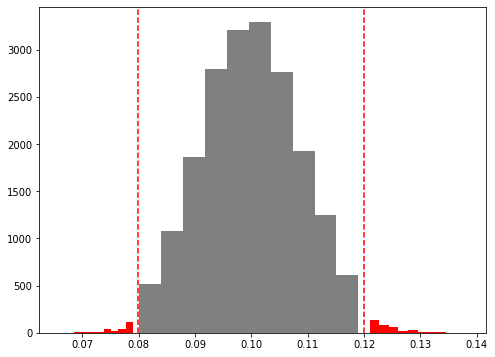

In [104]:
p_a = sig_test_a(prob_control, prob_treatment, runs = runs, plot = True)

Full Sample Probability: 0.1100
P Value: 0.08055


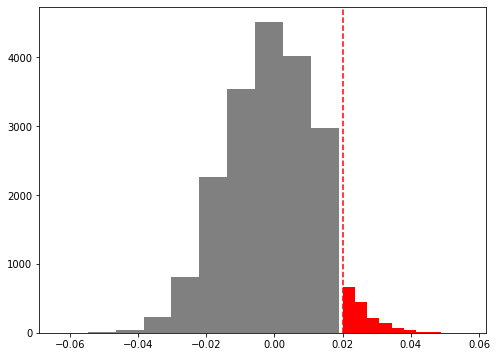

In [105]:
p_b = sig_test_b(prob_control, prob_treatment, runs = runs, plot = True)